<a href="https://colab.research.google.com/github/AlapatiVamsi05/DMT_Capstone/blob/main/4B55_CapstoneProjectCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing necessary packages**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

sns.set(style="whitegrid")
pd.set_option('display.max_columns', 100)


**Loading datasets**

In [ ]:

main_ds = pd.read_csv("/content/diabetic_data.csv")
map_ds = pd.read_csv("/content/IDS_mapping.csv")

print("Main dataset shape:", main_ds.shape)
print("Mapping dataset shape:", map_ds.shape)
main_ds.head()


Main dataset shape: (101766, 50)
Mapping dataset shape: (30, 6)


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


**Dataset Information**

In [ ]:
print("Dataset Info:")
print(main_ds.info())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  in

In [ ]:
# Check the first few rows and the column names
map_ds.head()
print("\n--- Column Names ---")
print(map_ds.columns.tolist())



--- Column Names ---
['admission_type_id', 'admission_type_id_description', 'discharge_disposition_id', 'discharge_disposition_id_description', 'admission_source_id', 'admission_source_id_discharge']


**Mapping IDS_mapping.csv onto diabetic_data.csv**

In [ ]:
admission_map = map_ds[['admission_type_id', 'admission_type_id_description']].drop_duplicates()
admission_map.columns = ['admission_type_id', 'admission_type_desc']

discharge_map = map_ds[['discharge_disposition_id', 'discharge_disposition_id_description']].drop_duplicates()
discharge_map.columns = ['discharge_disposition_id', 'discharge_desc']

source_map = map_ds[['admission_source_id', 'admission_source_id_discharge']].drop_duplicates()
source_map.columns = ['admission_source_id', 'admission_source_desc']

main_ds['admission_type_id'] = pd.to_numeric(main_ds['admission_type_id'], errors='coerce')
main_ds['discharge_disposition_id'] = pd.to_numeric(main_ds['discharge_disposition_id'], errors='coerce')
main_ds['admission_source_id'] = pd.to_numeric(main_ds['admission_source_id'], errors='coerce')

main_df = main_ds.merge(admission_map, on='admission_type_id', how='left')
main_df = main_df.merge(discharge_map, on='discharge_disposition_id', how='left')
main_df = main_df.merge(source_map, on='admission_source_id', how='left')

print("Merged dataset shape:", main_df.shape)
main_df[['admission_type_id', 'admission_type_desc',
         'discharge_disposition_id', 'discharge_desc',
         'admission_source_id', 'admission_source_desc']].head(10)


Merged dataset shape: (101766, 53)


,admission_type_id,admission_type_desc,discharge_disposition_id,discharge_desc,admission_source_id,admission_source_desc
0,6,NaN,25,Not Mapped,1,Physician Referral
1,1,Emergency,1,Discharged to home,7,Emergency Room
2,1,Emergency,1,Discharged to home,7,Emergency Room
3,1,Emergency,1,Discharged to home,7,Emergency Room
4,1,Emergency,1,Discharged to home,7,Emergency Room
5,2,Urgent,1,Discharged to home,2,Clinic Referral
6,3,Elective,1,Discharged to home,2,Clinic Referral
7,1,Emergency,1,Discharged to home,7,Emergency Room
8,2,Urgent,1,Discharged to home,4,Transfer from a hospital
9,3,Elective,3,Discharged/transferred to SNF,4,Transfer from a hospital


**Preprocessing the data**

In [ ]:
main_df.drop(['encounter_id', 'patient_nbr'], axis=1, inplace=True)

main_df.replace('?', np.nan, inplace=True)

main_df.dropna(thresh=0.9 * len(main_df), axis=1, inplace=True)

main_df.fillna(main_df.mode().iloc[0], inplace=True)

main_df['readmitted'] = main_df['readmitted'].replace({'>30': 'NO', '<30': 'YES', 'NO': 'NO'})

print("After cleaning:", main_df.shape)
main_df.head(3)


After cleaning: (101766, 46)


,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,admission_type_desc,discharge_desc,admission_source_desc
0,Caucasian,Female,[0-10),6,25,1,1,41,0,1,0,0,0,250.83,276,250,1,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,Emergency,Not Mapped,Physician Referral
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,Emergency,Discharged to home,Emergency Room
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,648,250,V27,6,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,Emergency,Discharged to home,Emergency Room


**Visualizing the data**

/tmp/ipython-input-2367169681.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='readmitted', data=main_df, palette='cool')


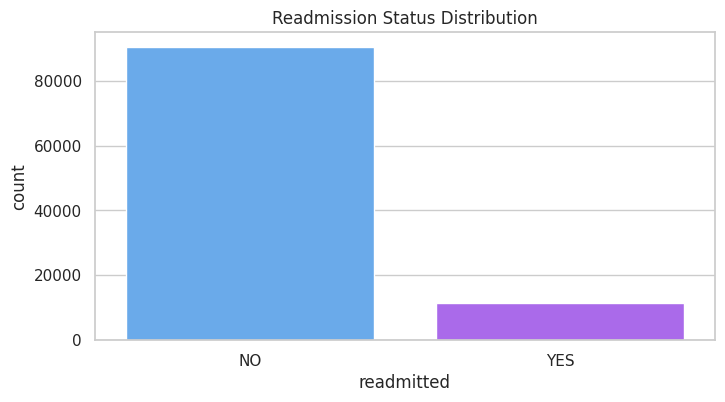

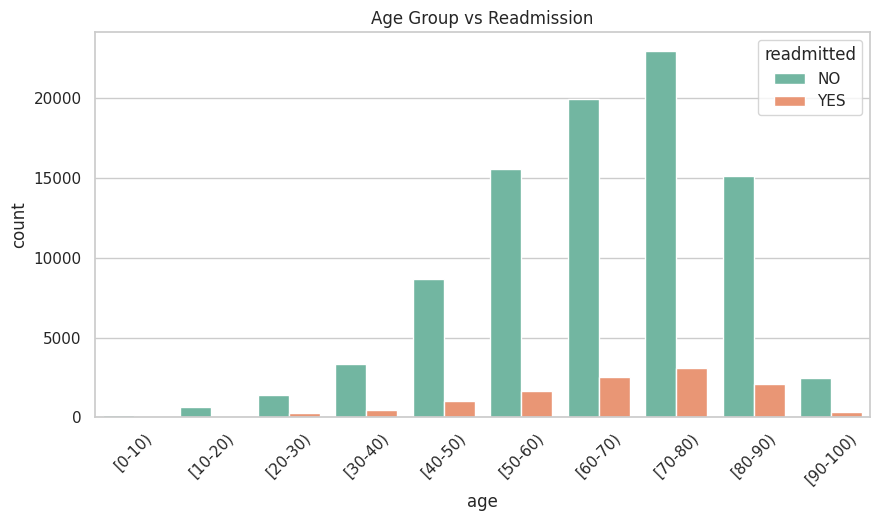

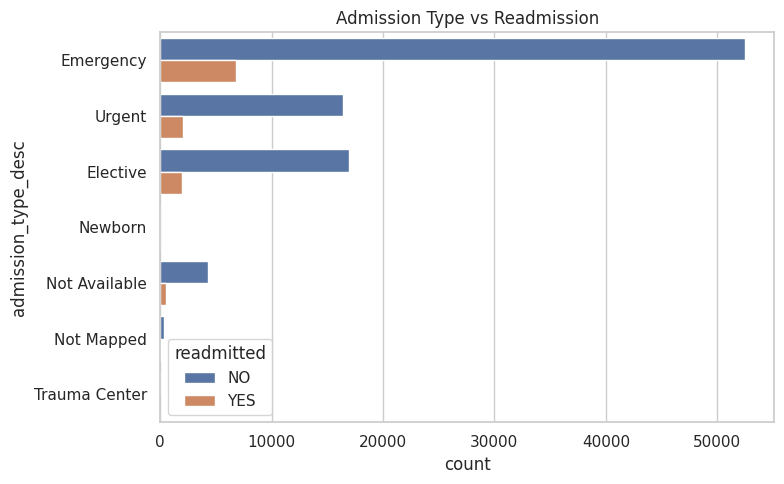

In [ ]:

plt.figure(figsize=(8,4))
sns.countplot(x='readmitted', data=main_df, palette='cool')
plt.title("Readmission Status Distribution")
plt.show()
print()
plt.figure(figsize=(10,5))
sns.countplot(x='age', hue='readmitted', data=main_df, palette='Set2')
plt.title("Age Group vs Readmission")
plt.xticks(rotation=45)
plt.show()
print()
plt.figure(figsize=(8,5))
sns.countplot(y='admission_type_desc', hue='readmitted', data=main_df)
plt.title("Admission Type vs Readmission")
plt.tight_layout()
plt.show()


**Turning categorical data into numerical data**

In [ ]:
categorical_cols = main_df.select_dtypes(include='object').columns
encoder = LabelEncoder()

for col in categorical_cols:
    main_df[col] = encoder.fit_transform(main_df[col].astype(str))


**Handling class imbalance**

In [ ]:
from imblearn.over_sampling import SMOTE

X = main_df.drop('readmitted', axis=1)
y = main_df['readmitted']

print("Before SMOTE:")
print(y.value_counts())

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("\nAfter SMOTE:")
print(y_resampled.value_counts())


Before SMOTE:
readmitted
0    90409
1    11357
Name: count, dtype: int64

After SMOTE:
readmitted
0    90409
1    90409
Name: count, dtype: int64


**Train-test splittting**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled,
    test_size=0.25,
    random_state=42,
    stratify=y_resampled
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 135613
Testing samples: 45205


**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42
)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)


**Evaluation**

=== Random Forest Performance ===

              precision    recall  f1-score   support

           0       0.82      0.91      0.86     22603
           1       0.90      0.79      0.84     22602

    accuracy                           0.85     45205
   macro avg       0.86      0.85      0.85     45205
weighted avg       0.86      0.85      0.85     45205

ROC-AUC: 0.9152732479664427


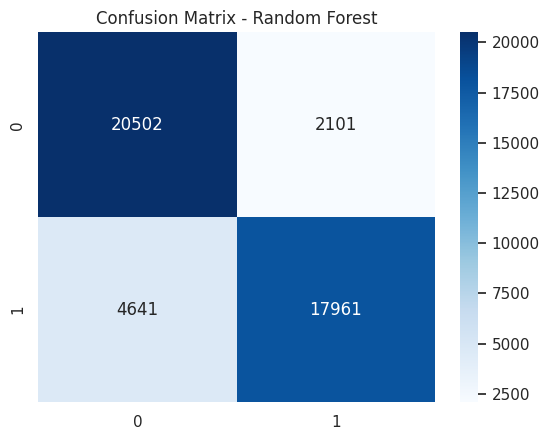

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

print("=== Random Forest Performance ===\n")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.show()


**Logistic Regression**

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


=== Logistic Regression Performance ===

              precision    recall  f1-score   support

           0       0.73      0.72      0.72     22603
           1       0.72      0.73      0.73     22602

    accuracy                           0.72     45205
   macro avg       0.72      0.72      0.72     45205
weighted avg       0.72      0.72      0.72     45205

ROC-AUC: 0.7992766464548725


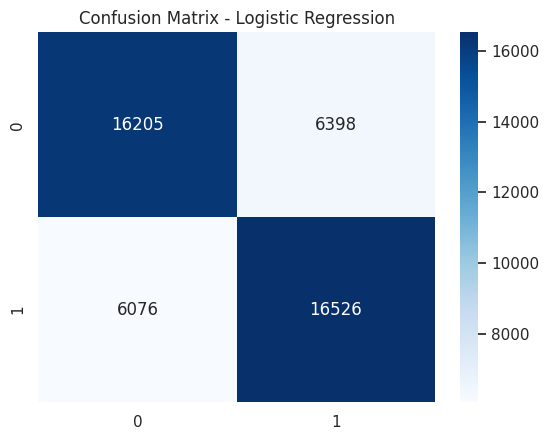

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

print("=== Logistic Regression Performance ===\n")
print(classification_report(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1]))

cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


**KNN**

=== KNN Performance ===

              precision    recall  f1-score   support

           0       0.96      0.62      0.76     22603
           1       0.72      0.97      0.83     22602

    accuracy                           0.80     45205
   macro avg       0.84      0.80      0.79     45205
weighted avg       0.84      0.80      0.79     45205

ROC-AUC: 0.9083854823991229


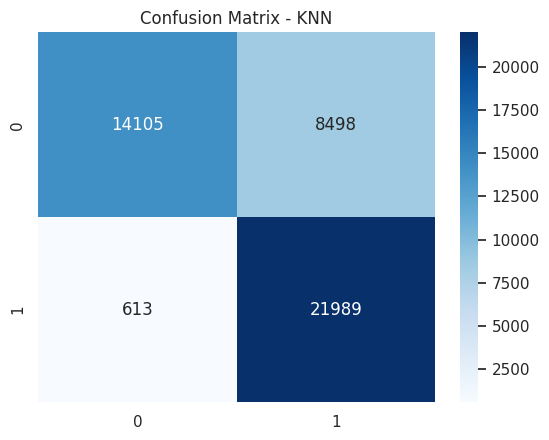

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("=== KNN Performance ===\n")
print(classification_report(y_test, y_pred_knn))
print("ROC-AUC:", roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1]))

cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - KNN")
plt.show()


**XGBoost**

=== XGBoost ===
              precision    recall  f1-score   support

           0       0.85      0.95      0.90     22603
           1       0.95      0.83      0.88     22602

    accuracy                           0.89     45205
   macro avg       0.90      0.89      0.89     45205
weighted avg       0.90      0.89      0.89     45205

ROC-AUC: 0.9395207054647158


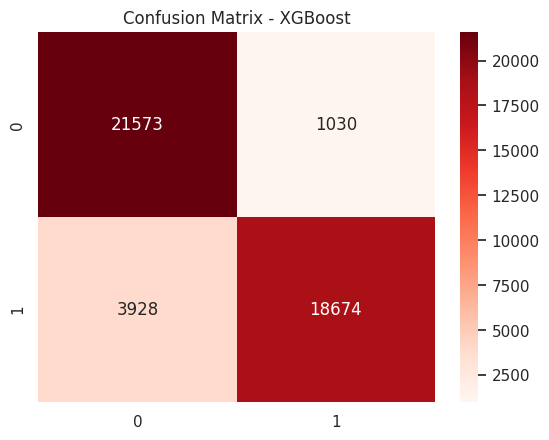

In [ ]:
!pip install xgboost > /dev/null

from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss'
)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("=== XGBoost ===")
print(classification_report(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, xgb.predict_proba(X_test)[:,1]))

cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Reds')
plt.title("Confusion Matrix - XGBoost")
plt.show()

**Decision Tree**

=== Decision Tree ===
              precision    recall  f1-score   support

           0       0.78      0.88      0.83     22603
           1       0.87      0.76      0.81     22602

    accuracy                           0.82     45205
   macro avg       0.82      0.82      0.82     45205
weighted avg       0.82      0.82      0.82     45205

ROC-AUC: 0.8884092145592832


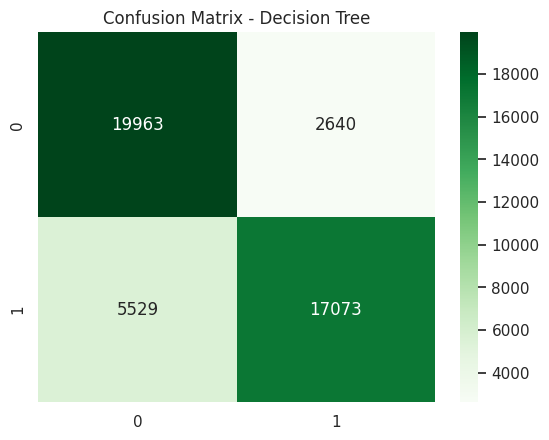

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=10, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("=== Decision Tree ===")
print(classification_report(y_test, y_pred_dt))
print("ROC-AUC:", roc_auc_score(y_test, dt.predict_proba(X_test)[:,1]))

cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Decision Tree")
plt.show()


**Comparison of models**

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import pandas as pd

models = {
    "Random Forest": rf,
    "Logistic Regression": log_reg,
    "KNN": knn,
    "Decision Tree": dt,
    "XGBoost": xgb
}

comparison = []

for name, model in models.items():
    X_eval = X_test
    y_pred = model.predict(X_eval)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, model.predict_proba(X_eval)[:, 1])

    comparison.append([name, acc, f1, auc])

results = pd.DataFrame(comparison, columns=["Model", "Accuracy", "F1 Score", "ROC-AUC"])
results = results.sort_values(by="ROC-AUC", ascending=False)
results.reset_index(drop=True, inplace=True)
results.style.background_gradient(cmap="Blues", subset=["Accuracy","F1 Score","ROC-AUC"])


,Model,Accuracy,F1 Score,ROC-AUC
0,XGBoost,0.890322,0.882806,0.939521
1,Random Forest,0.850857,0.841974,0.915273
2,KNN,0.798451,0.828383,0.908385
3,Decision Tree,0.819290,0.806948,0.888409
4,Logistic Regression,0.724057,0.726003,0.799277


**Visualization of results**

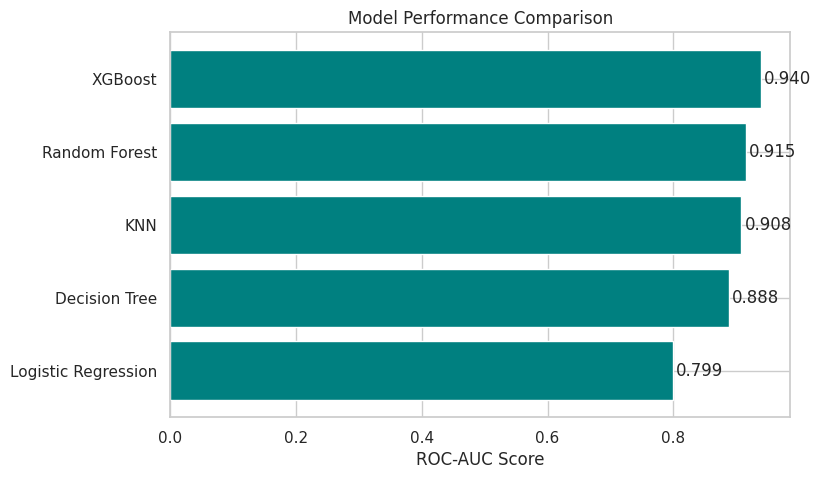

In [ ]:
plt.figure(figsize=(8,5))
plt.barh(results['Model'], results['ROC-AUC'], color='teal')
plt.xlabel("ROC-AUC Score")
plt.title("Model Performance Comparison")
plt.gca().invert_yaxis()
for i, v in enumerate(results['ROC-AUC']):
    plt.text(v + 0.005, i, f"{v:.3f}", va='center')
plt.show()
